In [346]:
%matplotlib inline
import ohmlr
import numpy as np
import matplotlib.pyplot as plt

In [348]:
n_features = 16
xmax_iter = 500
x_classes = [np.arange(8) for _ in range(n_features)]
y_classes = np.arange(3)
n_x_classes = [len(x_class) for x_class in x_classes]
n_y_classes = len(y_classes)
n_par = np.sum(n_x_classes)*n_y_classes
n_samples = n_par

In [349]:
model = ohmlr.ohmlr.ohmlr(x_classes=x_classes, y_classes=y_classes, random_coeff=True)

In [350]:
# fig = plt.figure(figsize=(4,4))
# ax = plt.gca()
# ax.hist([model.v, np.vstack(model.w).flatten()], label=['bias','weights'], density=True)
# ax.set_xlabel('$v, w$')
# ax.set_ylabel('density')
# plt.legend()
# plt.show()

In [351]:
v, w = np.copy(model.v), np.copy(model.w)
n_param = v.shape[0] + np.prod(w.shape)
x, y = model.generate_data(n_samples=n_samples)

In [352]:
# plt.plot(x[:,0])

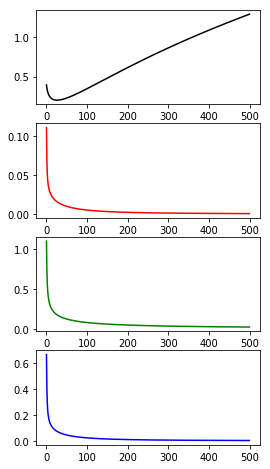

In [353]:
model.fit(x, y, max_iter=1)
mse = np.empty(max_iter)
disc = np.empty(max_iter)
for it in range(max_iter):
    model.fit(x, y, max_iter=1, v_init=model.v, w_init=model.w)
    mse[it] = (((v-model.v)**2).sum() + ((w-model.w)**2).sum()) / n_param
    disc[it] = model.disc[0]

model.fit(x, y, max_iter=max_iter)
fig, ax = plt.subplots(4, 1, figsize=(4,8))
ax[0].plot(mse, 'k-')
ax[1].plot(model.disc, 'r-')
ax[2].plot(model.ll, 'g-')
ax[3].plot(model.err, 'b-')

In [354]:
# print(model.score(x, y))

# fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# ax[0].plot(mse, 'k-')
# bx = ax[0].twinx()
# bx.plot(model.disc, 'r-')

# lo = min(v.min(), np.vstack(w).min())
# hi = max(v.max(), np.vstack(w).max())
# grid = np.linspace(lo, hi)
# ax[1].plot(grid, grid, 'k--', alpha=0.5)
# ax[1].scatter(model.v, v, c='r', s=10)
# ax[1].scatter(np.vstack(model.w).flatten(), np.vstack(w).flatten(), c='b', s=1)
# ax[0].set_xlabel('iteration')
# ax[0].set_ylabel('discrepancy')
# ax[1].set_xlabel('fitted')
# ax[1].set_ylabel('true')
# plt.tight_layout()
# plt.show()